# AI ML Project | Applied Statistics

###### 1. Import the necessary libraries

In [112]:
%matplotlib inline    
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

###### 2. Read the data as a data frame

Loading the data using the Pandas module - **read_csv function** 

In [113]:
insurance_df = pd.read_csv(r"C:\Users\Shireen\Downloads\AIML_Content\insurance.csv")

In [115]:
insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


------------------------------------------------------------

###### 3. Perform basic EDA which should include the following and print out your insights at every step.

###### 3a. Shape of the data

Finding the attributes of the data - Shape, Dimension & Size usig **shape**, **size** & **ndim** keywords

In [116]:
insurance_df.ndim

2

This is a 2 Dimensional dataa frame

In [117]:
insurance_df.shape

(1338, 7)

The 2D-dataframe is having 1338 rows and 7 columns.

In [118]:
insurance_df.size

9366

The 2D-dataframe has 9366 records

------------------------------------------------------------

###### 3b. Data type of each attribute

Data type of each attribute can be detrmined using **Info** function

In [119]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


**Finding**: 
- The 'Age', 'BMI', 'Children' & 'Charges' are of the the Float & Int data type.
- The ones with the 'OBJECT' attribute 'sex','smoker' and 'region' need to be converted.
- No null data

----------------------------------------------------

###### 3c. Checking the presence of missing values

The missing values can be determined using **isnull or isna** function.
- It returns a TRUE or FALSE value (True is missing data, False if no missing data is found)
- To get the TOTAL count of MISSING VALUE can be found by using the **SUM** function.

In [120]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Finding: ** No missing and null value present in the dataframe.

-----------------------------------------------------------

###### 3d. 5 point summary of numerical attributes
The 5 Point is a set of descriptive statistics that provides information about a dataset. It consists of the five most important sample percentiles: 
- Minunum
- Q1 - 25%
- Q2 - 50% i.e Median
- Q3 - 75% 
- Maximum value

This can be determined using the **DESCRIBE** function

In [121]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Analysis**: 
Age Column:
- Minumum age is 18 & the maximum age is 64 years
- The age is distributed as a true age distribution in a population

Children Column:
- 75% of the people have 2 or less children
- maximum children in a family are 5

Charges Column:
- The charges column is higly skewed as most people would require basic medical care are over 50 years of age


**Box Plot analysis** done using the **Seaborn module** - Visualizing the descriptive statistics
- Boxplot analysis done on Numerical columns like AGE, BMI, CHILDREN

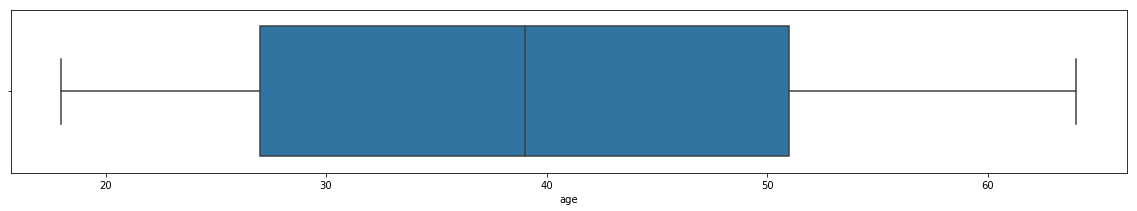

In [122]:
plt.figure(figsize=(20,3))
sns.boxplot(insurance_df["age"])

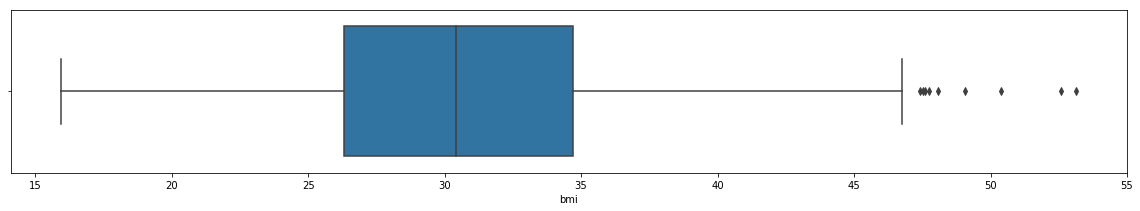

In [123]:
plt.figure(figsize=(20,3))
sns.boxplot(insurance_df["bmi"])

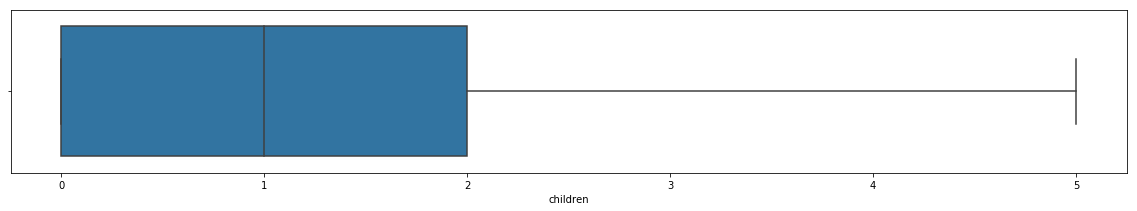

In [124]:
plt.figure(figsize=(20,3))
sns.boxplot(insurance_df["children"])

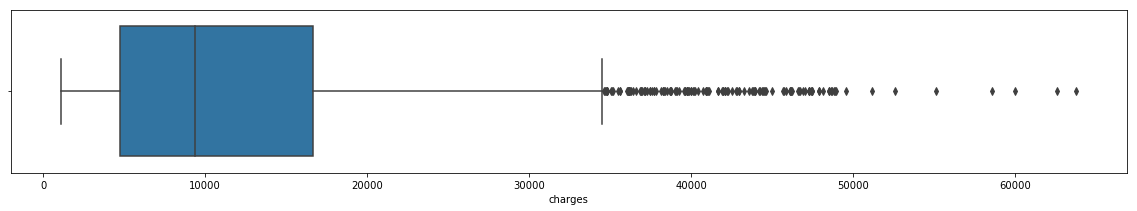

In [125]:
plt.figure(figsize=(20,3))
sns.boxplot(insurance_df["charges"])

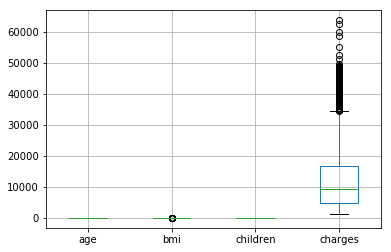

In [126]:
insurance_df.boxplot(figsize=(50,10))

**Finding:** Based on the above analysis - the Charges column is having much outliers which might impact the model.

-----------------------------------------------

###### 3e.Distribution of ‘BMI’, ‘AGE’ and ‘CHARGES’ columns.
Can be detrmined using the DISTPLOT & HISTPLOT visualizations

**Histogram - Hist Plot** Analysis for Age, BMI, Charges columns

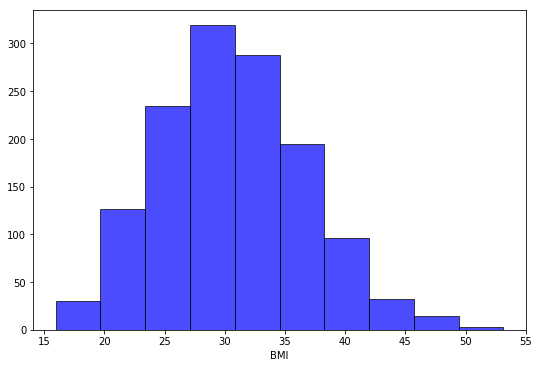

In [127]:
plt.figure(figsize= (30,20))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color='blue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('BMI')


**BMI Distribution** - Is in a considerable good shape not much left skewness is present. Very less people with lower BMI exists in the dataset.

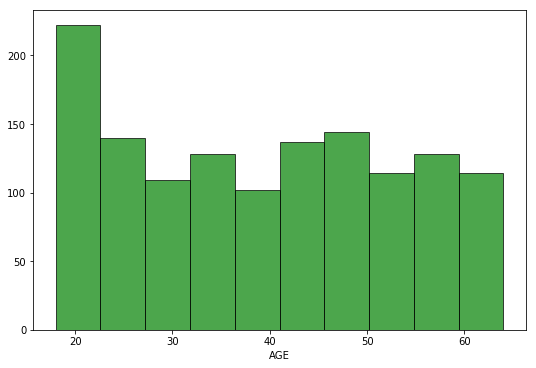

In [128]:
plt.figure(figsize= (30,20))
plt.subplot(3,3,2)
plt.hist(insurance_df.age, color='green', edgecolor = 'black', alpha = 0.7)
plt.xlabel('AGE')


**Age Distribution** - This attribute tells highest participation is done by the age around 20yrs old customers. Though the data is very very slightly more for higher age people is present.

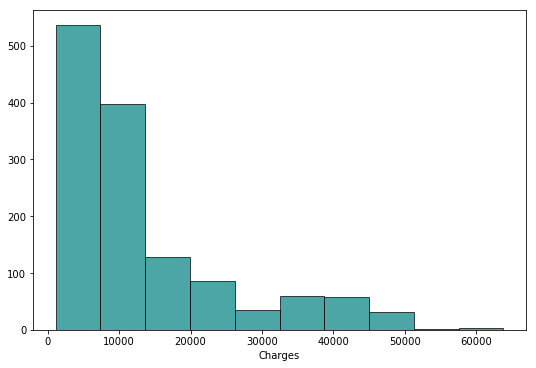

In [129]:
plt.figure(figsize= (30,20))
plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color='teal', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Charges')


**Charges Distribution** - High left skewness in the dataset tells that mostly less individual medical costs is billed by health insurance.

--------------------------------------------------

**Dist Plot** Analysis for Age, BMI, Charges columns

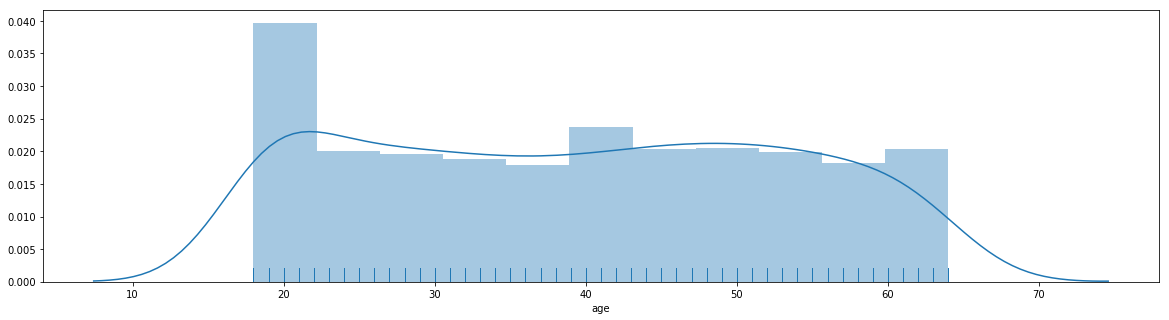

In [130]:
plt.figure(figsize=(20,5))
sns.distplot(insurance_df['age'], kde=True, rug=True)

Age is **Uniformly distributed**

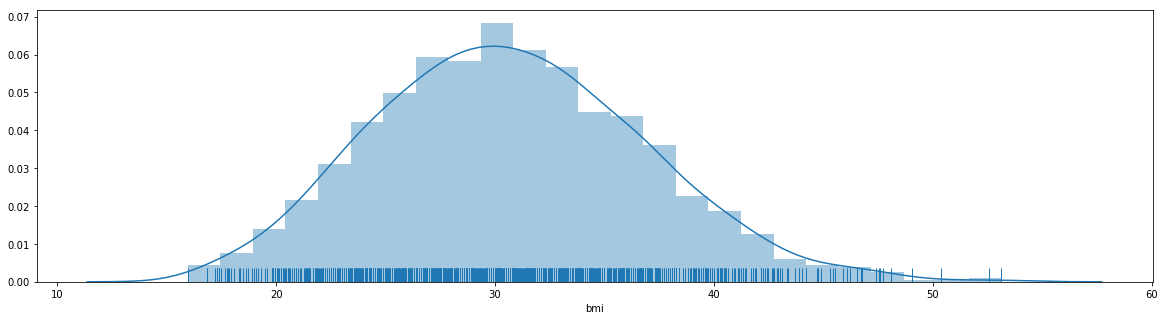

In [131]:
plt.figure(figsize=(20,5))
sns.distplot(insurance_df['bmi'], kde=True, rug=True)

BMI is **normally distributed**


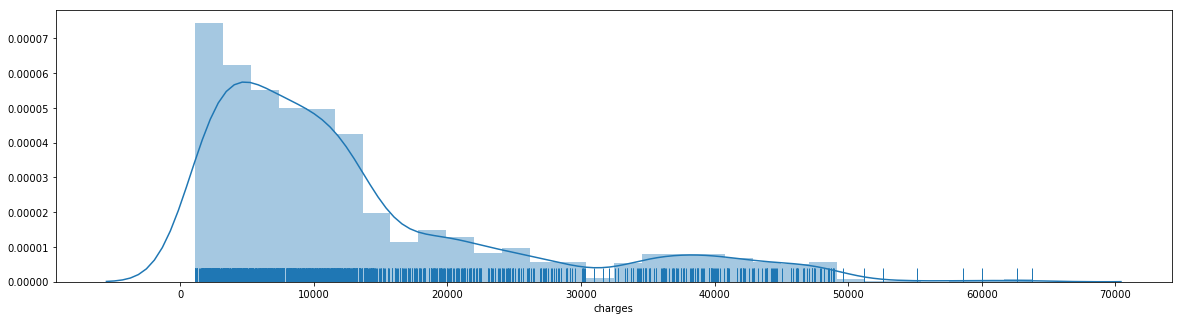

In [132]:
plt.figure(figsize=(20,5))
sns.distplot(insurance_df['charges'], kde=True, rug=True)

Charges are **highly skewed**

------------------------------------------------------

###### 3f.Measure of skewness of BMI, Age & Charges columns

Measure the skeweness of the required columns using the **skew()** function from the **scipy.stats module**

In [133]:
stats

<module 'scipy.stats' from 'C:\\Users\\Shireen\\Anaconda3\\lib\\site-packages\\scipy\\stats\\__init__.py'>

In [134]:
skewness_measure = pd.DataFrame({'Skewness_Measure' : [stats.skew(insurance_df.bmi), # Get BMI skew measure
                                                       stats.skew(insurance_df.age), # Get Age skew measure
                                                       stats.skew(insurance_df.charges)]}, # Get Charges skew measure
                                               index=['BMI','Age','Charges'])  
skewness_measure

,Skewness_Measure
BMI,0.283729
Age,0.055610
Charges,1.514180


**Finding**:

- BMI Skew measure -> Very less skew.

- Age Skew measure -> Very less; least compared to all other attributes, uniformly distributed, there's hardly any skew.

- Charges Skew measure ->  Highlyy skewed, most compared to all other attributes.

-------------------------------------------------------

###### 3g. Checking the presence of outliers in BMI, Age & Charges columns

Data & inference is based on the boxplots created.

IQR -> Inter Quartile Range 

In [135]:
inter_quartile_range = np.subtract(*np.percentile(insurance_df['charges'], [75, 25]))

print(inter_quartile_range)

11899.625365


1. Identifing the **outliers** for the **CHARGES column**

In [136]:
q_25 = np.percentile(insurance_df['charges'], 25)
q_75 = np.percentile(insurance_df['charges'], 75)

inter_quartile_range = q_75 - q_25

cut_off_value = inter_quartile_range * 1.5

lower_range  = q_25 - cut_off_value
upper_range = q_75 + cut_off_value

outliers_charge = [i for i in insurance_df['charges'] if i < lower_range or i > upper_range]

print('The OUTLIERS for CHARGE column out of the identified total of 1338 records:', len(outliers_charge))

The OUTLIERS for CHARGE column out of the identified total of 1338 records: 139


**Finding**: 
- BMI has very less skew value, meaning the BMI values are of least extreme range
- Indicating that very less people have the BMI value out of the mean BMI value of the data set.

2. Identifing the **outliers** for the **BMI column**

In [137]:
q_25 = np.percentile(insurance_df['bmi'], 25)
q_75 = np.percentile(insurance_df['bmi'], 75)

inter_quartile_range = q_75 - q_25

cut_off_value = inter_quartile_range * 1.5

lower_range  = q_25 - cut_off_value
upper_range = q_75 + cut_off_value

outliers_bmi = [i for i in insurance_df['bmi'] if i < lower_range or i > upper_range]

print('The OUTLIERS for BMI column out of the identified total of 1338 records:', len(outliers_bmi))

The OUTLIERS for BMI column out of the identified total of 1338 records: 9


**Finding**: 
- As previous finding, CHARGES had the highest skewness with 1.514. 
- Its understood that there are values of extreme ranges. 
- People from the dataset are very rarely charged HIGHLY.

3. Identifing the **outliers** for the **Age column**

In [138]:
q_25 = np.percentile(insurance_df['age'], 25)
q_75 = np.percentile(insurance_df['age'], 75)

inter_quartile_range = q_75 - q_25

cut_off_value = inter_quartile_range * 1.5

lower_range  = q_25 - cut_off_value
upper_range = q_75 + cut_off_value

outliers_age = [i for i in insurance_df['age'] if i < lower_range or i > upper_range]

print('The OUTLIERS for Age column out of the identified total of 1338 records:', len(outliers_age))

The OUTLIERS for Age column out of the identified total of 1338 records: 0


**Finding**: No outliers found in the Age attribute.

--------------------------------------------------------------

###### 3h. Distribution of categorical columns (include children)

The **Categorical distribution plots** can be determined by creating **Univariate & Bivariate** plots.
**Univariate** - Bar charts, Line charts, Countplots


**Bivariate Plot** - Catergorical Distribution

##### With respect to **male or female**, i.e sex column and **Charges**

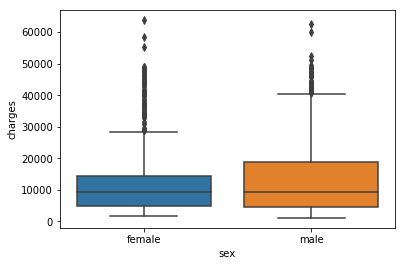

In [139]:
sns.boxplot(x='sex', y='charges', data= insurance_df)

**Finding**: In both the male and female we see many among them had paid the extreme charges.Female has more outliers while males have a right skew telling more of them pay higher charges.

##### With respect to **Children** and **Charges**

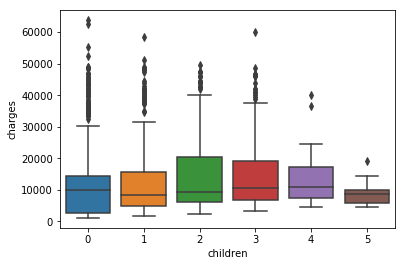

In [140]:
sns.boxplot(x='children', y='charges', data= insurance_df)

**Finding**: In some cases we see the extremly higher charges are paid by people having no child while least paid when having 5 children.

##### With respect to **Region** and **Charges**

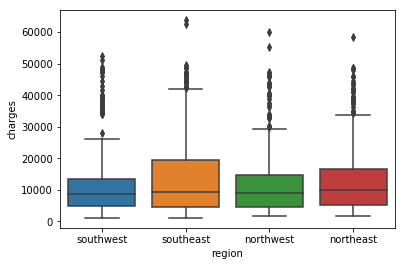

In [141]:
sns.boxplot(x='region', y='charges', data= insurance_df)

**Finding:** Each location is having some extreme cases.Though southeast customers pay higher charges more.

##### With respect to being a **Smoker** and **Charges**

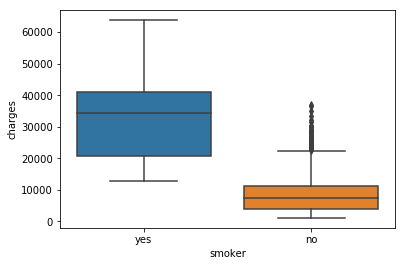

In [142]:
sns.boxplot(x='smoker', y='charges', data= insurance_df)

**Findingg: **Smokers pay higher medical costs billed by health insurance than the non-smokers.However, there are some outliers exists in the nonsmoker who pay higher charges.

----------------------------------------------------------

**Univariate Plot** - Estimate Distribution

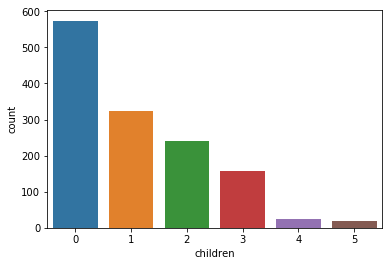

In [143]:
sns.countplot(insurance_df['children'])

**Finding: ** More customers are not having children while very less have 5 children.

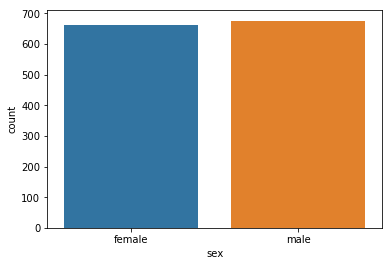

In [144]:
sns.countplot(insurance_df['sex'])

**Finding: ** The gender ratio of insurance contractor is not significantly different.

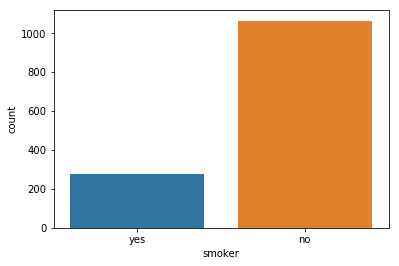

In [145]:
sns.countplot(insurance_df['smoker'])

**Finding: **The count of non-smokers is quite high than the smokers in the sample. 

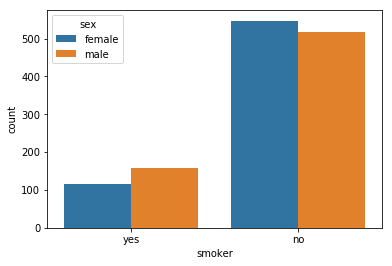

In [146]:
sns.countplot(insurance_df['smoker'],hue = insurance_df['sex'])

**Finding: ** This tells the habit of smoking is not gender specific.

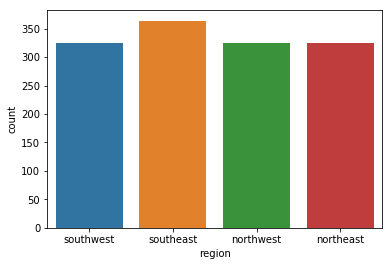

In [147]:
sns.countplot(insurance_df['region'])

**Finding: **Instances are distributed evenly accross all regions.

-----------------------------------------------------------------

###### 3i. Pair plot that includes all the columns of the dataframe

The first step would be to perform **Label encoding** the variables because pairplot ignores string values

In [148]:
encoded_insurance_df = copy.deepcopy(insurance_df)

##### Pairplot for ALL ROWS & only SEX, SMOKER & REGION columns

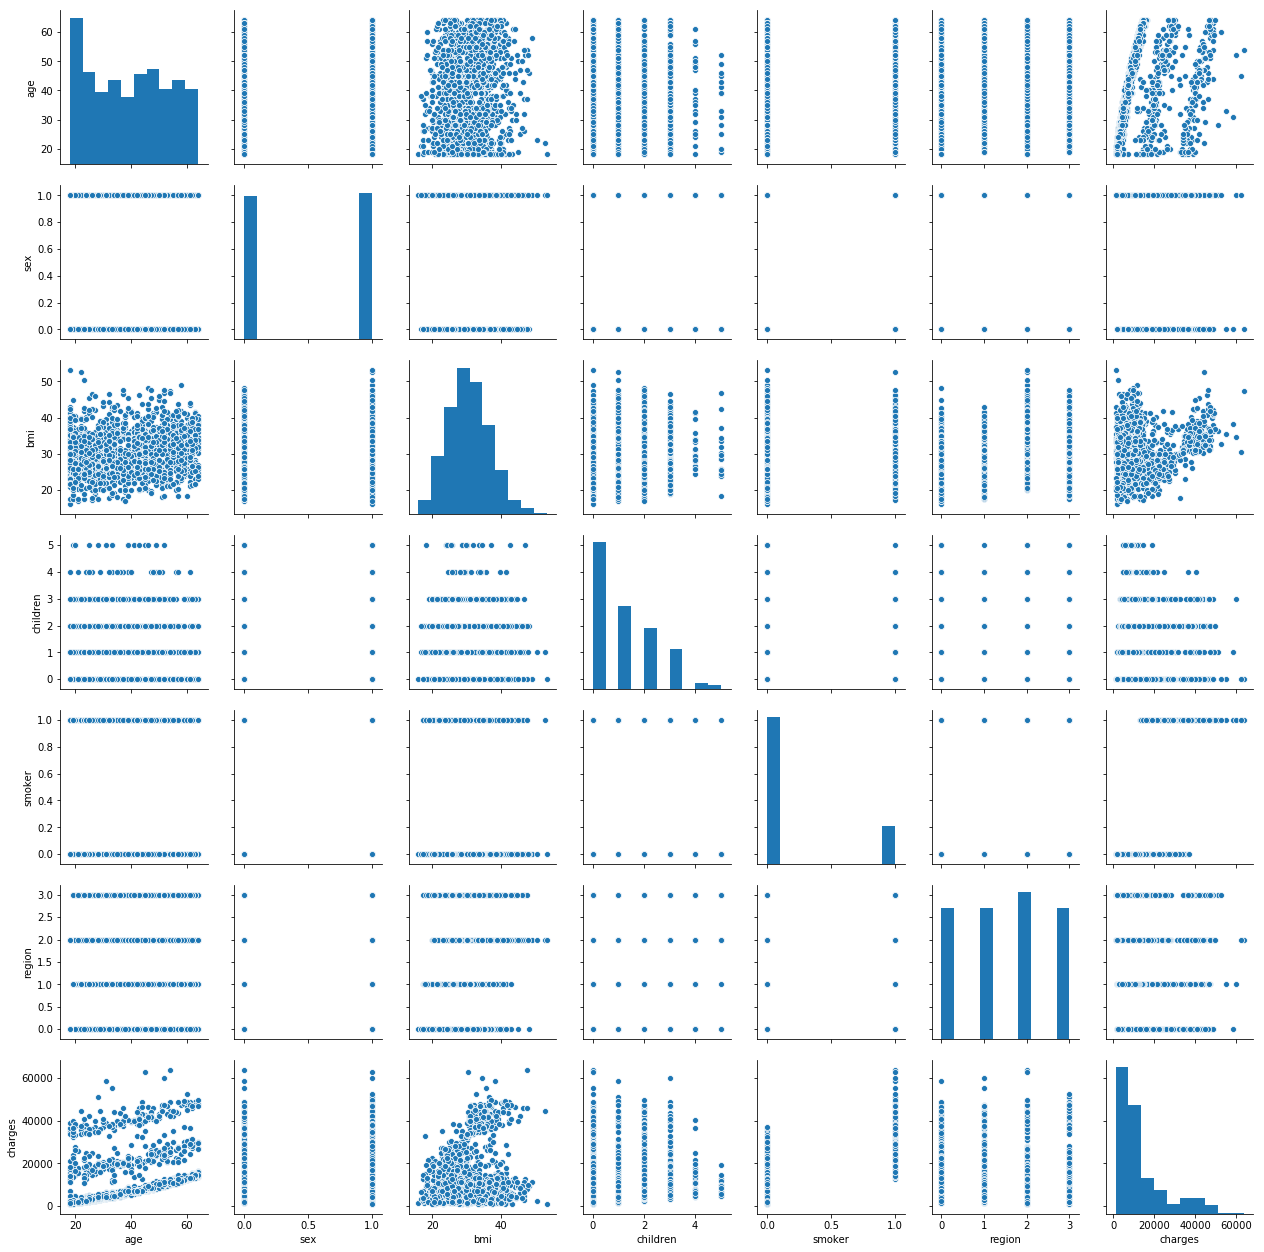

In [149]:
encoded_insurance_df.loc[:,['sex', 'smoker', 'region']] = insurance_df.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(encoded_insurance_df) 

**Finding & Analysis** 

- There's an interesting pattern between 'Age' and 'Charges' - maybe even for the same casulty or ailment the older people are charged more than the younger ones

- The only obvious correlation of 'Charges' is with 'Smoker'

- It seems like that the smokers claimed more insurance than the non-smokers


----------------------------------------------------------------------

### 4. Answer the following questions with statistical evidence

##### 4a. Do charges of people who smoke differ significantly from the people who don't?

In [150]:
insurance_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

###### Maximum are NON SMOKERS 

We can create a **Scatter plot** to look for visual evidence of dependency between attributes **SMOKER** and **Charges** accross different ages

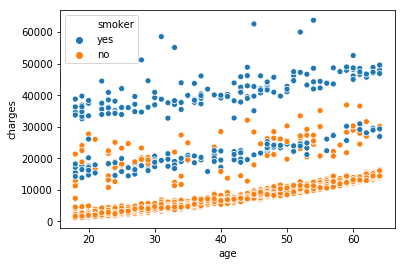

In [151]:
sns.scatterplot(insurance_df.age, insurance_df.charges, hue = insurance_df.smoker)

- Through the SCATTER PLOT, we can see that smokers differ significantly from the no-smokers.


### Applying T-test to determine the impact of smoking on the charges.
**The p-value is about the strength of a hypothesis.**

In [152]:
Ho = "Charges of SMOKER & Non SMOKER are SAME"   
Ha = "Charges of SMOKER & Non SMOKER are NOT SAME"

# Selecting charges corresponding to smokers as an array, where SMOKER value is YES
x = np.array(insurance_df[insurance_df.smoker == 'yes'].charges) 

# Selecting charges corresponding to non - smokers as an array, where SMOKER value is NO
y = np.array(insurance_df[insurance_df.smoker == 'no'].charges)

# Using the ttest function from the Stats module
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(f"The p - value is : {p_value}")

The p - value is : 8.271435842177219e-283


**Question**: Do charges of people who smoke differ significantly from the people who don't?¶

**Answer: ** YES 
- It is observed that the SMOKERS (blue) have to pay extra in charges compared to NON SMOKERS (orange) - due to heath complications that arise due to smoking. 
- It tells us that the paid charges by the smokers and non-smokers is significantly different.Smokers pay higher charges in comparison to the non-smokers.

----------------------------------------------------

##### 4b. Does BMI of males differ significantly from that of females?

In [153]:
insurance_df.sex.value_counts() 

male      676
female    662
Name: sex, dtype: int64

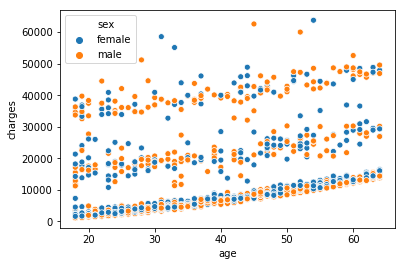

In [154]:
sns.scatterplot(insurance_df.age, insurance_df.charges, hue= insurance_df.sex  )

**We can not conclude the relation between AGE and CHARGES.**

### Applying T-test to determine the gender & BMI 

**The p-value is about the strength of a hypothesis.**

In [155]:
Ho = "Gender has NO impact on BMI"   
Ha = "Gender has impact on BMI"   

# Selecting BMI corresponding to GENDER as an array,
x = np.array(insurance_df[insurance_df.sex == 'male'].charges) 

# Selecting BMI corresponding to GENDER as an array,
x = np.array(insurance_df[insurance_df.sex == 'female'].charges) 

# Using the ttest function from the Stats module
t, p_value  = stats.ttest_ind(x,y, axis = 0)  

print(f"The p - value is : {p_value}")

The p - value is : 5.709559222298131e-23


**Question**: Does BMI of males differ significantly from that of females?

**Answer: ** NO
- Gender has NO impact on BMI.

---------------------------------------------------

###### 4c. Is the proportion of smokers significantly different in different genders?

We will perform **Chi_square** test to check the proportion of smokers differs as per gender.

In [156]:
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has effect on smoking habits"   

cross_tab = pd.crosstab(insurance_df['sex'],insurance_df['smoker']) 

chi, p_value, dof, expected =  stats.chi2_contingency(cross_tab)

print(f"The p - value is : {p_value}")

The p - value is : 0.006548143503580696


**Rejecting null hypothesis**.

**Question**: Is the proportion of smokers significantly different in different genders?

**Answer: ** YES
- Smoking habits differs with the gender.

--------------------------------------------

###### 4d. Is the distribution of BMI across women with no children, one child and two children, the same ?

**Applying anova test to check the proportion**

In [157]:
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)

print(f"The p - value is : {p_value}")

The p - value is : 0.7158579926754841


**Accepting the null hypothesis.**
Hence,it tells the number of children is not effecting any difference in women bmi.

**Question**: Is the distribution of BMI across women with no children, one child and two children, the same ?

**Answer: ** No
- Number of children does not bring any difference in BMI value of the women